In [2]:
%tensorflow_version 2.x

KERAS

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


Fashion_mnist Dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images[0,23,23]

194

One Pixel

Our pixel Values are between 0 and 255,0 being black and 255 being white.  

This means that we have a grayscale image as there is no colour channel

In [7]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/Top","Trouser","pull-over","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle-Boot"]

To display: 

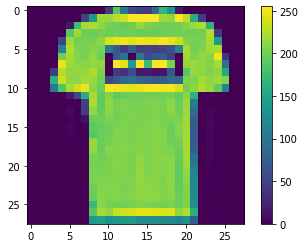

In [11]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Data Processing 

This refers to applying some prior transformations to our data before feeding it to the model

In this case we will simply scale all all our grayscale pixel values (0-255) to between 0 and 1.We ca do this by dividing each value in the training and test data set by 255. Smaller values make processing easier. 

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Building the model

In [15]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation="relu"),
                          keras.layers.Dense(10,activation="softmax")])

The sequential is the simplest neural network model.Flatten allows us to take the 28x28 matrix like structure and flatten it out.Flatten converts the shape 28x28 array into a vector of 784 neurons.

Dense means each layer neuron in this layer is connected to all neurons in the previous layer .128 and 10 are output neurons , 10 representing the number of classes.  

Softmax is used for probability distribution.

Compiling the Model:

In [16]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Training the model:

In [32]:
model.fit(train_images,train_labels,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1411 - accuracy: 0.9474
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1400 - accuracy: 0.9484
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1364 - accuracy: 0.9494


Evaluation:

In [33]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8908


In [34]:
print("Test Accuracy",test_acc)

Test Accuracy 0.8907999992370605


If accuracy of traing model > testing model , it is called over-fitting. 

Prediction:

In [35]:
predictions=model.predict(test_images)

In [39]:
print(class_names[np.argmax(predictions[11])])

Sandal


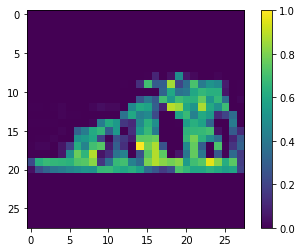

In [41]:
plt.figure()
plt.imshow(test_images[11])
plt.colorbar()
plt.grid(False)
plt.show()